In [1]:
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
BATCH_SIZE=32
EPOCH=12
LR=0.01
#torch.manual_seed(1)
x=torch.linspace(-1,1,1000)
# print(x)

In [3]:
x=torch.unsqueeze(x,dim=1)
# print(x)

In [4]:
y=x.pow(2)+0.1*torch.normal(torch.zeros(x.size()))
# print(y)

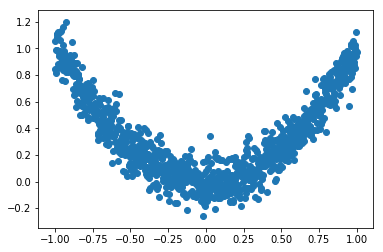

In [5]:
plt.scatter(x.numpy(),y.numpy())
plt.show()
torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(
    dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=2
)

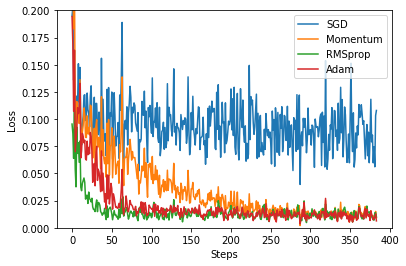

In [6]:
# 定义一个神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
    def forward(self,x):
        x=self.hidden(x)
        x=F.relu(x)
        x=self.predict(x)
        return x
# 为每个优化器创建一个 net
net_SGD         = Net()   # 梯度下降
net_Momentum    = Net()   # 在SGD基础上改进后的梯度下降
net_RMSprop     = Net()   # 在Momentum基础上改进后的梯度下降
net_Adam        = Net()   # 在RMSprop基础上改进后的梯度下降
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]
# 定义各个优化器
optimizer_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
optimizer_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
optimizer_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
optimizer_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers=[optimizer_SGD,optimizer_Momentum,optimizer_RMSprop,optimizer_Adam]

# 误差计算函数
loss_func=torch.nn.MSELoss() # 均方差误差计算
losses_his=[[],[],[],[]]

for epoch in range(EPOCH):
    for step,(batch_x,batch_y) in enumerate(loader):
        batch_x=Variable(batch_x)
        batch_y=Variable(batch_y)
        for net,optimizer,losses in zip(nets,optimizers,losses_his):
            target=net(batch_x)
            loss=loss_func(target,batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.data.numpy())
labels=['SGD','Momentum','RMSprop','Adam']
for i,losses in enumerate(losses_his):
    plt.plot(losses,label=labels[i])
plt.legend(loc='best') 
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim(0,0.2)
plt.show()            